# Shapefiles

The shapefiles are downloaded from OCHA (https://data.humdata.org/) website.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use("default")

In this notebook, we simply read each of the shapefiles that map the corresponding political boundaries.

In [2]:
# Define the path to the shapefile data released by OCHA.
PATH_TO_SHAPEFILES = "./OCHA_data/"
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_shapefiles/"

## Yemen

### Administrative level 1

In [3]:
# Read OCHA file.
yemen = gpd.read_file(PATH_TO_SHAPEFILES + "Yemen/yem_admbnda_adm1_govyem_cso_20191002.shp")
yemen.head()

,ADM0_EN,ADM0_AR,ADM0_PCODE,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1REF_EN,ADM1ALT1AR,ADM1ALT1EN,ADM1ALT2AR,ADM1ALT2EN,date_,validOn,validTo,geometry
0,Yemen,اليمن,YE,Ibb,اب,YE11,Ibb,None,None,None,None,2019-02-01,2019-10-02,None,"POLYGON ((44.08076 14.38973, 44.08362 14.37772..."
1,Yemen,اليمن,YE,Abyan,ابين,YE12,Abyan,None,None,None,None,2019-02-01,2019-10-02,None,"POLYGON ((46.29563 14.26991, 46.29770 14.26687..."
2,Yemen,اليمن,YE,Sana'a City,امانة العاصمه,YE13,Sanaa City,None,None,None,None,2019-02-01,2019-10-02,None,"POLYGON ((44.33380 15.60702, 44.35087 15.59940..."
3,Yemen,اليمن,YE,Al Bayda,البيضاء,YE14,Al Bayda,None,None,None,None,2019-02-01,2019-10-02,None,"MULTIPOLYGON (((44.72676 14.15240, 44.72637 14..."
4,Yemen,اليمن,YE,Ta'iz,تعز,YE15,Taiz,None,None,None,None,2019-02-01,2019-10-02,None,"MULTIPOLYGON (((43.41111 12.67158, 43.41124 12..."


In [4]:
yemen.ADM1_EN.unique()

array(['Ibb', 'Abyan', "Sana'a City", 'Al Bayda', "Ta'iz", 'Al Jawf',
       'Hajjah', 'Al Hodeidah', 'Hadramawt', 'Dhamar', 'Shabwah',
       "Sa'dah", "Sana'a", 'Aden', 'Lahj', "Ma'rib", 'Al Mahwit',
       'Al Maharah', 'Amran', "Ad Dali'", 'Raymah', 'Socotra'],
      dtype=object)

In [5]:
# Keep only 'geometry' and adminstratas information.
yemen = yemen[["ADM1_EN", "geometry"]]
yemen.rename({"ADM1_EN": "region"}, axis = 1, inplace = True)

In [6]:
# Rename some regions.
yemen.region.replace({"Sana'a City": "Amanat Al Asimah", "Ta'iz": "Taizz", "Al Hodeidah": "Al Hudaydah", 
                      "Hadramawt": "Hadramaut", "Ma'rib": "Marib", "Ad Dali'": "Al Dhale'e", "Sa'dah": "Sa'ada"}, 
                     inplace = True)

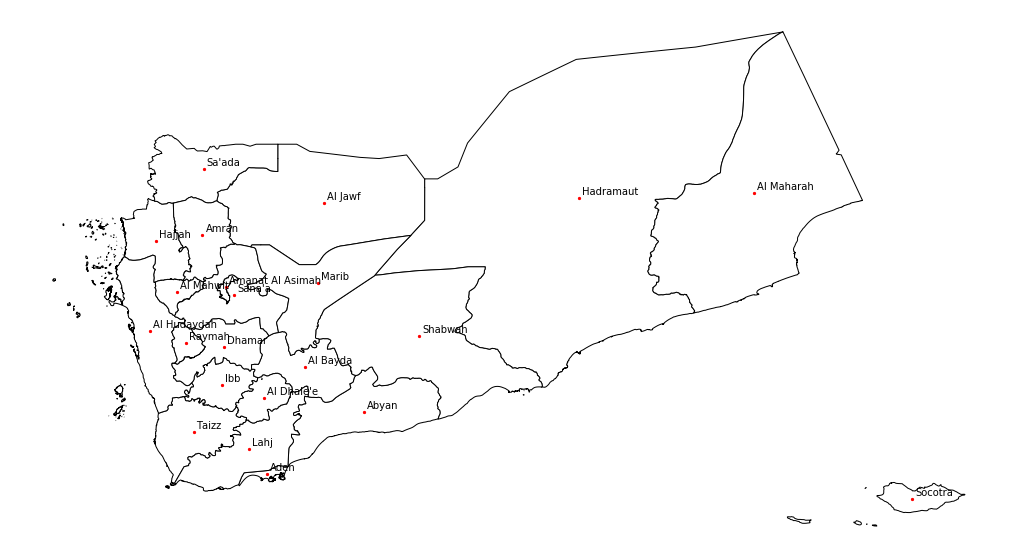

In [7]:
fig, ax = plt.subplots(figsize = (30, 10))

ax.set_aspect("equal")
ax.axis("off")
yemen.plot(ax = ax, color = "white", edgecolor = "black")
yemen.centroid.plot(ax = ax, marker = "o", color = "red", markersize = 5)
for x, y, label in zip(yemen.centroid.geometry.x, yemen.centroid.geometry.y, yemen["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points");

In [8]:
# Save shapefile.
yemen.to_file(PATH_TO_SAVE_DATA + "Yemen/administrative_level_1/Yemen.shp")

## Burkina Faso

### Administrative level 1

In [9]:
# Read OCHA file.
burkina_faso = gpd.read_file(PATH_TO_SHAPEFILES + "Burkina Faso/bfa_admbnda_adm1_igb_20200323.shp")
burkina_faso.head()

,Shape_Leng,Shape_Area,ADM1_FR,ADM1_PCODE,ADM1_REF,ADM1ALT1FR,ADM1ALT2FR,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
0,12.979104,2.866733,Boucle du Mouhoun,BF46,None,None,None,Burkina Faso,BF,2020-03-18,2020-03-23,None,"POLYGON ((-3.18158 13.67744, -3.18109 13.67721..."
1,9.431868,1.509470,Cascades,BF47,None,None,None,Burkina Faso,BF,2020-03-18,2020-03-23,None,"POLYGON ((-5.38923 11.00086, -5.37382 10.97698..."
2,3.287168,0.248302,Centre,BF13,None,None,None,Burkina Faso,BF,2020-03-18,2020-03-23,None,"POLYGON ((-1.60508 12.67250, -1.58739 12.67057..."
3,8.425414,1.201324,Centre-Est,BF48,None,None,None,Burkina Faso,BF,2020-03-18,2020-03-23,None,"POLYGON ((-0.30646 12.55612, -0.30573 12.55588..."
4,7.905622,1.646603,Centre-Nord,BF49,None,None,None,Burkina Faso,BF,2020-03-18,2020-03-23,None,"MULTIPOLYGON (((-0.76975 12.55062, -0.77002 12..."


In [10]:
# Keep only 'geometry' and adminstratas information.
burkina_faso = burkina_faso[["ADM1_FR", "geometry"]]
burkina_faso.rename({"ADM1_FR": "region"}, axis = 1, inplace = True)

In [11]:
# Rename some regions.
burkina_faso.region.replace(["Boucle du Mouhoun"], ["Boucle-Du-Mouhoun"], inplace = True)

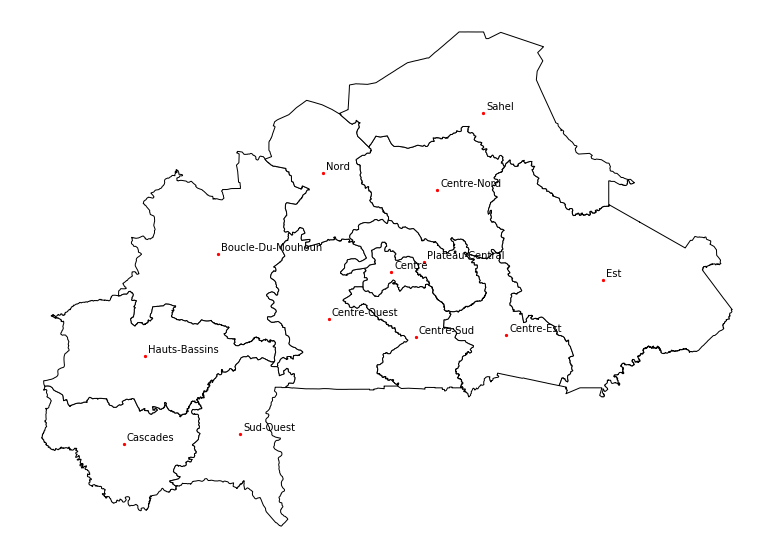

In [12]:
fig, ax = plt.subplots(figsize = (30, 10))

ax.set_aspect("equal")
ax.axis("off")
burkina_faso.plot(ax = ax, color = "white", edgecolor = "black")
burkina_faso.centroid.plot(ax = ax, marker = "o", color = "red", markersize = 5)
for x, y, label in zip(burkina_faso.centroid.geometry.x, burkina_faso.centroid.geometry.y, burkina_faso["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points");

In [13]:
# Save shapefile.
burkina_faso.to_file(PATH_TO_SAVE_DATA + "Burkina Faso/administrative_level_1/Burkina Faso.shp")

## Cameroon

### Administrative level 1

In [14]:
# Read OCHA file.
cameroon = gpd.read_file(PATH_TO_SHAPEFILES + "Cameroon/cmr_admbnda_adm1_inc_20180104.shp")
cameroon.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_FR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1FR,ADM1ALT2FR,ADM0_EN,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
0,15.151424,5.235540,Adamawa,Adamaoua,CM001,None,None,None,None,None,Cameroon,Cameroun (le),CM,2018-12-17,2019-01-04,None,"POLYGON ((12.28874 8.18170, 12.28379 8.16514, ..."
1,16.170961,5.601567,Centre,Centre,CM002,None,None,None,None,None,Cameroon,Cameroun (le),CM,2018-12-17,2019-01-04,None,"POLYGON ((11.99753 6.26224, 11.99793 6.25936, ..."
2,18.826415,8.956520,East,Est,CM003,None,None,None,None,None,Cameroon,Cameroun (le),CM,2018-12-17,2019-01-04,None,"POLYGON ((14.39484 6.06262, 14.39542 6.06071, ..."
3,13.272860,2.826867,Far-North,Extrême-Nord,CM004,None,None,None,None,None,Cameroon,Cameroun (le),CM,2018-12-17,2019-01-04,None,"POLYGON ((14.53742 12.94356, 14.54344 12.93673..."
4,10.673468,1.646349,Littoral,Littoral,CM005,None,None,None,None,None,Cameroon,Cameroun (le),CM,2018-12-17,2019-01-04,None,"POLYGON ((9.84789 5.33234, 9.84934 5.32882, 9...."


In [15]:
# Keep only 'geometry' and adminstratas information.
cameroon = cameroon[["ADM1_EN", "geometry"]]
cameroon.rename({"ADM1_EN": "region"}, axis = 1, inplace = True)

In [16]:
# Rename some regions.
cameroon.region.replace(["Centre"], ["Central"], inplace = True)

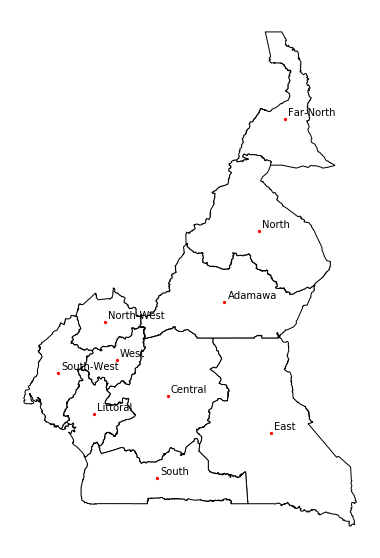

In [17]:
fig, ax = plt.subplots(figsize = (30, 10))

ax.set_aspect("equal")
ax.axis("off")
cameroon.plot(ax = ax, color = "white", edgecolor = "black")
cameroon.centroid.plot(ax = ax, marker = "o", color = "red", markersize = 5)
for x, y, label in zip(cameroon.centroid.geometry.x, cameroon.centroid.geometry.y, cameroon["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points");

In [18]:
# Save shapefile.
cameroon.to_file(PATH_TO_SAVE_DATA + "Cameroon/administrative_level_1/Cameroon.shp")

## Mali

### Administrative level 1

In [19]:
# Read OCHA file.
mali = gpd.read_file(PATH_TO_SHAPEFILES + "Mali/mli_admbnda_adm1_1m_dnct_20190802.shp")
mali.head()

,Shape_Leng,Shape_Area,ADM1_FR,ADM1_PCODE,ADM1_REF,ADM1ALT1FR,ADM1ALT2FR,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
0,0.751734,0.020439,Bamako,ML09,None,None,None,Mali (le),ML,2013-05-31,2019-08-02,None,"POLYGON ((-7.92938 12.68171, -7.92905 12.68149..."
1,19.331703,15.140157,Gao,ML07,None,None,None,Mali (le),ML,2013-05-31,2019-08-02,None,"POLYGON ((0.37572 18.05626, 0.46348 17.95185, ..."
2,20.449044,10.250256,Kayes,ML01,None,None,None,Mali (le),ML,2013-05-31,2019-08-02,None,"POLYGON ((-9.33008 15.49779, -9.32934 15.49680..."
3,18.857370,12.919863,Kidal,ML08,None,None,None,Mali (le),ML,2013-05-31,2019-08-02,None,"POLYGON ((1.20128 20.72027, 1.21518 20.72013, ..."
4,21.764713,7.563718,Koulikoro,ML02,None,None,None,Mali (le),ML,2013-05-31,2019-08-02,None,"POLYGON ((-9.00038 15.49748, -8.98331 15.49567..."


In [20]:
# Keep only 'geometry' and adminstratas information.
mali = mali[["ADM1_FR", "geometry"]]
mali.rename({"ADM1_FR": "region"}, axis = 1, inplace = True)

In [21]:
# Rename some regions.
mali.region.replace(["Ségou", "Gao", "Tombouctou"], ["Segou", "Gao-Menaka", "Tombouctou-Taoudeni"], inplace = True)

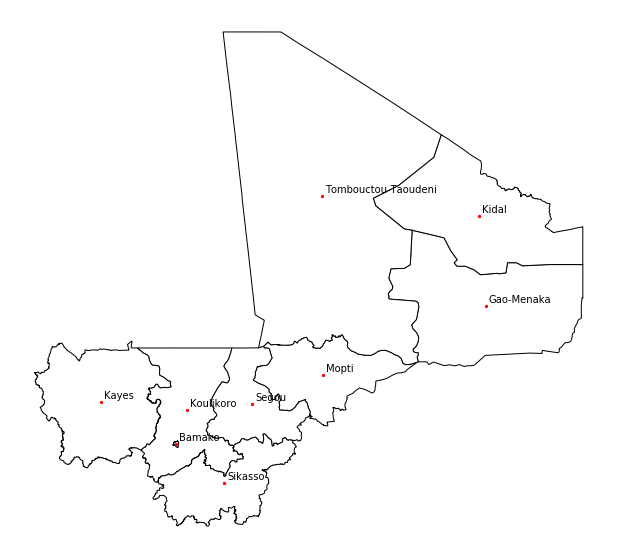

In [22]:
fig, ax = plt.subplots(figsize = (30, 10))

ax.set_aspect("equal")
ax.axis("off")
mali.plot(ax = ax, color = "white", edgecolor = "black")
mali.centroid.plot(ax = ax, marker = "o", color = "red", markersize = 5)
for x, y, label in zip(mali.centroid.geometry.x, mali.centroid.geometry.y, mali["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points");

In [23]:
# Save shapefile.
mali.to_file(PATH_TO_SAVE_DATA + "Mali/administrative_level_1/Mali.shp")

## Niger

### Administrative level 1

In [24]:
# Read OCHA file.
niger = gpd.read_file(PATH_TO_SHAPEFILES + "Niger/NER_adm01_feb2018.shp")
niger.head()

,OBJECTID,adm_01,Shape_Leng,Shape_Area,rowcacode1,NOMREG,ISO3,ISO2,geometry
0,1,Agadez,32.960455,53.547633,NER001,AGADEZ,NER,NE,"POLYGON ((11.98901 23.53319, 11.99796 23.51602..."
1,2,Diffa,18.408306,12.306259,NER002,DIFFA,NER,NE,"POLYGON ((15.55942 18.00625, 15.55675 17.95649..."
2,3,Dosso,8.965807,2.617021,NER003,DOSSO,NER,NE,"POLYGON ((3.66840 11.98401, 3.66388 11.98413, ..."
3,4,Maradi,8.531121,3.293766,NER004,MARADI,NER,NE,"POLYGON ((7.76947 14.42108, 7.82971 14.41669, ..."
4,5,Niamey,1.068639,0.046497,NER008,NIAMEY,NER,NE,"POLYGON ((2.09448 13.61969, 2.09711 13.61829, ..."


In [25]:
# Keep only 'geometry' and adminstratas information.
niger = niger[["adm_01", "geometry"]]
niger.rename({"adm_01": "region"}, axis = 1, inplace = True)

In [26]:
# Rename some regions.
niger.region.replace(["Tillabéri"], ["Tillaberi"], inplace = True)

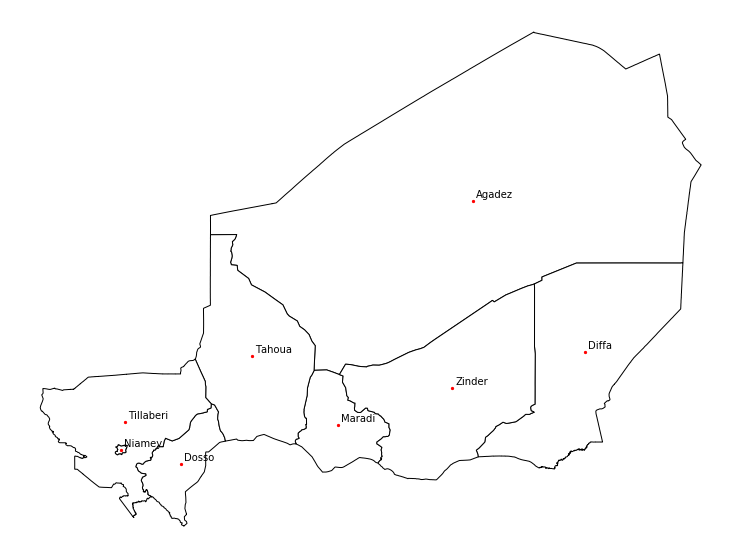

In [27]:
fig, ax = plt.subplots(figsize = (30, 10))

ax.set_aspect("equal")
ax.axis("off")
niger.plot(ax = ax, color = "white", edgecolor = "black")
niger.centroid.plot(ax = ax, marker = "o", color = "red", markersize = 5)
for x, y, label in zip(niger.centroid.geometry.x, niger.centroid.geometry.y, niger["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points");

In [28]:
# Save shapefile.
niger.to_file(PATH_TO_SAVE_DATA + "Niger/administrative_level_1/Niger.shp")

## Nigeria

### Administrative level 1

In [29]:
# Read OCHA file.
nigeria = gpd.read_file(PATH_TO_SHAPEFILES + "Nigeria/nga_admbnda_adm1_osgof_20190417.shp")
nigeria.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,4.695135,0.396543,Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((7.38681 6.03667, 7.38729 6.03605, 7...."
1,11.525443,3.113007,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((13.62129 10.94823, 13.62592 10.94822..."
2,5.263830,0.549476,Akwa Ibom,NG003,Akwa Ibom,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609..."
3,3.595960,0.392661,Anambra,NG004,Anambra,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((6.93254 6.71090, 6.93167 6.69870, 6...."
4,13.952005,4.011018,Bauchi,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((10.75125 12.46148, 10.75615 12.39191..."


In [30]:
# Keep only 'geometry' and adminstratas information.
nigeria = nigeria[["ADM1_EN", "geometry"]]
nigeria.rename({"ADM1_EN": "region"}, axis = 1, inplace = True)

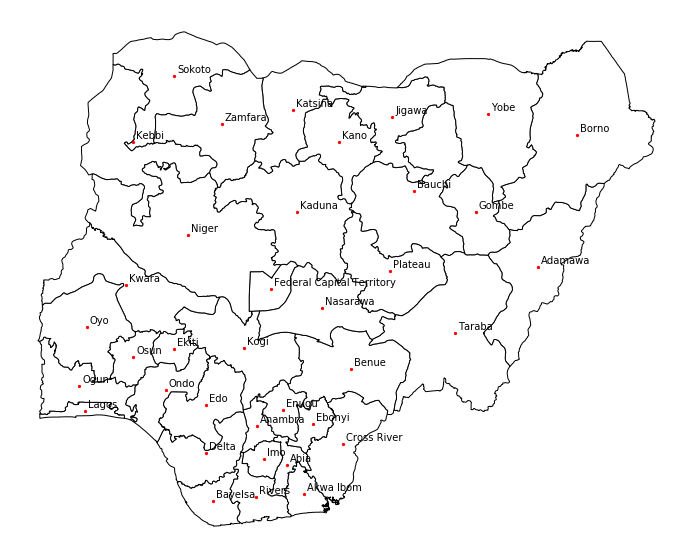

In [31]:
fig, ax = plt.subplots(figsize = (30, 10))

ax.set_aspect("equal")
ax.axis("off")
nigeria.plot(ax = ax, color = "white", edgecolor = "black")
nigeria.centroid.plot(ax = ax, marker = "o", color = "red", markersize = 5)
for x, y, label in zip(nigeria.centroid.geometry.x, nigeria.centroid.geometry.y, nigeria["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points");

In [32]:
# Save shapefile.
nigeria.to_file(PATH_TO_SAVE_DATA + "Nigeria/administrative_level_1/Nigeria.shp")

## Syria

### Administrative level 1

In [33]:
# Read OCHA file.
syria = gpd.read_file(PATH_TO_SHAPEFILES + "Syria/syr_admbnda_adm1_uncs_unocha_20201217.shp")
syria.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,geometry
0,7.896684,2.330266,Al-Hasakeh,الحسكة,SY08,None,None,None,None,None,Syrian Arab Republic,الجمهورية العربية السورية,SY,2017-06-01,2020-12-17,None,"POLYGON ((42.22692 37.27664, 42.22710 37.27661..."
1,9.302662,1.993687,Aleppo,حلب,SY02,None,None,None,None,None,Syrian Arab Republic,الجمهورية العربية السورية,SY,2017-06-01,2020-12-17,None,"POLYGON ((38.29637 36.90689, 38.31160 36.90575..."
2,7.030809,1.762222,Ar-Raqqa,الرقة,SY11,None,None,None,None,None,Syrian Arab Republic,الجمهورية العربية السورية,SY,2017-06-01,2020-12-17,None,"POLYGON ((38.79528 36.69788, 38.80076 36.69744..."
3,3.511850,0.611739,As-Sweida,السويداء,SY13,None,None,None,None,None,Syrian Arab Republic,الجمهورية العربية السورية,SY,2017-06-01,2020-12-17,None,"POLYGON ((36.88491 33.05645, 36.89817 33.05393..."
4,0.608190,0.011323,Damascus,دمشق,SY01,None,None,None,None,None,Syrian Arab Republic,الجمهورية العربية السورية,SY,2017-06-01,2020-12-17,None,"POLYGON ((36.32519 33.56409, 36.32534 33.56412..."


In [34]:
# Keep only 'geometry' and adminstratas information.
syria = syria[["ADM1_EN", "geometry"]]
syria.rename({"ADM1_EN": "region"}, axis = 1, inplace = True)

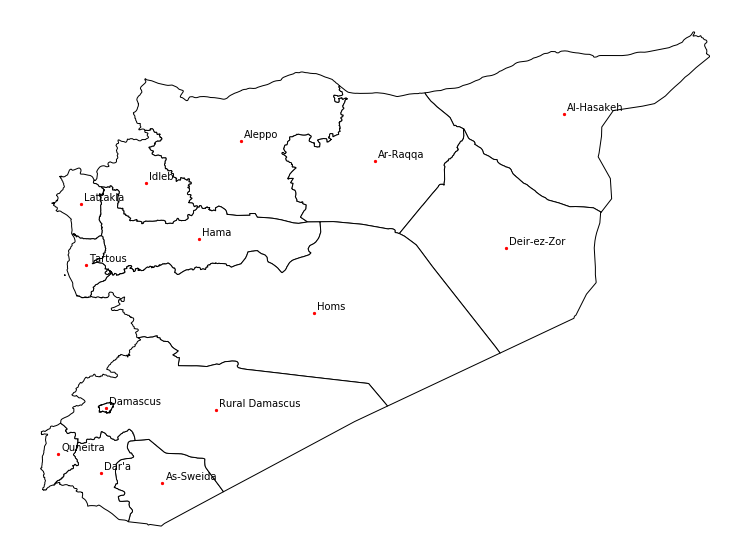

In [35]:
fig, ax = plt.subplots(figsize = (30, 10))

ax.set_aspect("equal")
ax.axis("off")
syria.plot(ax = ax, color = "white", edgecolor = "black")
syria.centroid.plot(ax = ax, marker = "o", color = "red", markersize = 5)
for x, y, label in zip(syria.centroid.geometry.x, syria.centroid.geometry.y, syria["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points");

In [36]:
# Save shapefile.
syria.to_file(PATH_TO_SAVE_DATA + "Syria/administrative_level_1/Syria.shp")